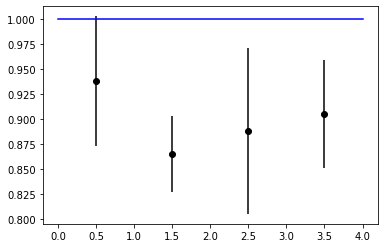

In [20]:
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

si = np.array([0.065,0.038,0.083,0.054])
RX_SM   = np.array([1,1,1,1])
toy_cv  = np.array([0.85,0.85,1,0.85])
# throw toy from SM
xi = np.array([ np.random.normal(val,err) for val, err in zip(toy_cv,si) ])

plt.plot( (0,4), (1,1), 'b-', label='SM')
plt.errorbar( np.arange(4)+0.5, xi, yerr=si, fmt='ko' )
#plt.set_xticklabels(['RK low','RK mid','RK* low','RK* mid'])
plt.show()

In [45]:
# Tim says weighted average
wi = 1/si**2

R = sum( wi*xi )/sum(wi)
Rerr = 1/sum(wi)**0.5
print('Weighted average = {:5.3f} +/- {:5.3f}'.format(R,Rerr))
print('Significance     = {:4.2f}'.format((1-R)/Rerr))


Weighted average = 0.889 +/- 0.027
Significance     = 4.16
1260.6541470621014


Weighted average = 0.890 +/- 0.027
Significance     = 4.16


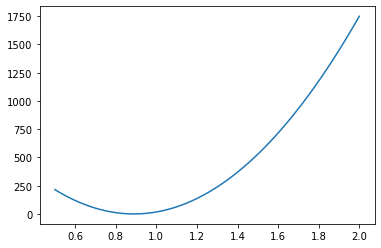

In [44]:

def n2ll(mu):
    return np.sum( (xi-mu)**2 / si**2 )

vec_n2ll = np.vectorize(n2ll)

mu = np.linspace(0.5,2,100)
vals = vec_n2ll(mu)
plt.plot(mu,vals)

# minimise n2ll
m = Minuit(n2ll, mu=1)
m.errordef = 1
m.limits['mu'] = (0,2)
m.migrad()
m.hesse()

sig = (n2ll(1)-n2ll(m.values['mu']))**0.5
print('Weighted average = {:5.3f} +/- {:5.3f}'.format(m.values['mu'],m.errors['mu']))
print('Significance     = {:4.2f}'.format(sig))
